# Betas

In [40]:
import numpy as np
from math import atan2
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tqdm import tqdm

In [249]:
mu = np.array([[-1,0],[1,0],[.5,2], [-1.1,0.1]])
sigma = np.array([ [[.2,0],[0,.2]], [[.2,.1],[.1,.3]], [[.8,0],[0,.8]], [[.2,0],[0,.2]]])
L = np.zeros(sigma.shape)
L_diag = np.zeros(sigma.shape[0:2])


In [250]:
for n in np.arange(sigma.shape[0]):
    temp = np.linalg.cholesky(sigma[n])
    L[n] = np.linalg.inv(temp).T
    L_diag[n] = np.log(np.diag(L[n]))
L_lower = np.tril(L, -1)

In [251]:
x = np.array([0,0])
def _b(x, mu, L, L_diag):
    return (-1 / 2) * np.linalg.norm((x - mu) @ L) ** 2 - (n / 2) * np.log(2 * np.pi) + np.sum(L_diag)
def B(x,mu=mu,L=L,L_diag=L_diag):
    return np.array([_b(x, mu[i], L[i], L_diag[i]) for i in range(mu.shape[0])])

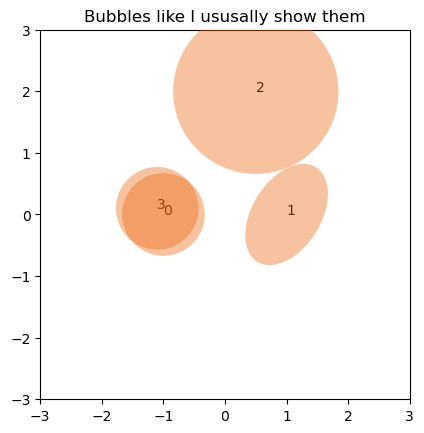

In [297]:
alpha_coefficient = 1
fig, ax = plt.subplots()
for n in np.arange(mu.shape[0]):
    el = np.linalg.inv(L[n])
    sig = el.T @ el
    u, s, v = np.linalg.svd(sig)
    width, height = np.sqrt(s[0]) * 3, np.sqrt(s[1]) * 3
    angle = atan2(v[0, 1], v[0, 0]) * 360 / (2 * np.pi)
    el = Ellipse((mu[n, 0], mu[n, 1]), width, height, angle=angle, zorder=8)
    el.set_alpha(0.4 * alpha_coefficient)
    el.set_clip_box(ax.bbox)
    el.set_facecolor('#ed6713')
    ax.add_artist(el)
    d = min(width, height)
    ax.text(mu[n, 0] + 0 * d, mu[n, 1] + 0 * d, str(n), clip_on=True)
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_title("Bubbles like I ususally show them");
ax.set_aspect('equal', 'box');

In [298]:
l = np.linspace(-3,3,200)
p = np.zeros((l.size, l.size))

for ix, x in enumerate(l):
    for iy, y in enumerate(l):
        p[iy, ix] = max(B(np.array([x, y])))

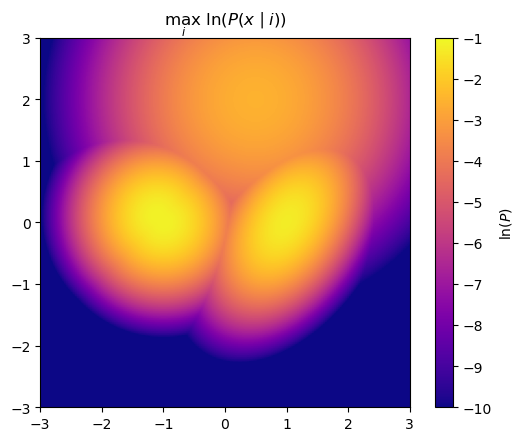

In [310]:
plt.imshow(p, origin="lower", clim=[-10,-1], extent=[-3,3,-3,3], cmap=plt.colormaps['plasma'])
cbar = plt.colorbar()
cbar.ax.set_ylabel(r"$\ln(P)$");
plt.title("$\max_i\ \ln(P(x \mid i))$");

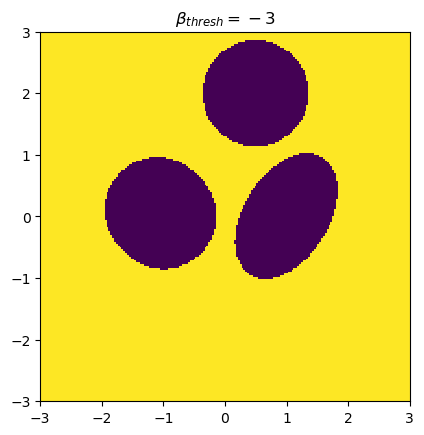

100%|███████████████████████████████████████| 100/100 [01:18<00:00,  1.27it/s]


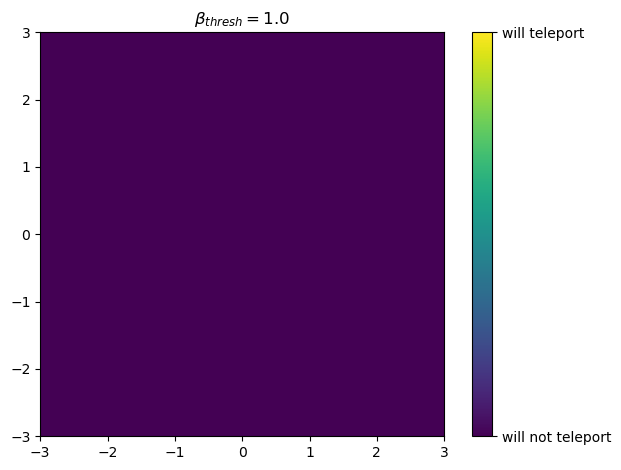

In [296]:
movie = True
fig, ax = plt.subplots(layout='tight')
cbar = None
if movie:
    movie_writer = animation.FFMpegFileWriter(fps=5)
    movie_writer.setup(fig, "/home/jgould/Documents/Bubblewrap/generated/other/varying_b.gif", dpi=100)



l = np.linspace(-3,3,200)
p = np.zeros((l.size, l.size))


g = [-5, -4]
if movie:
    g = tqdm(np.linspace(-19,1,100))

for b_thresh in g:
    ax.cla()
    for ix, x in enumerate(l):
        for iy, y in enumerate(l):
            p[iy, ix] = max(B(np.array([x, y]))) < b_thresh
        
    im = ax.imshow(p, origin="lower", extent=[-3,3,-3,3], interpolation="nearest")
    ax.set_title(f"$\\beta_{{thresh}} = {b_thresh:.1f}$")
    if cbar is None:
        cbar = fig.colorbar(im, ticks=[0,1])
        cbar.ax.set_yticklabels(["will not teleport", "will teleport"])
        
    
    if movie:
        movie_writer.grab_frame()

if movie:
    movie_writer.finish()

# Inverse-Wishart distribution

In [1]:
import scipy.stats as stats

In [77]:
iw = stats.invwishart(df=20000, scale=[[1,0],[0,1]])

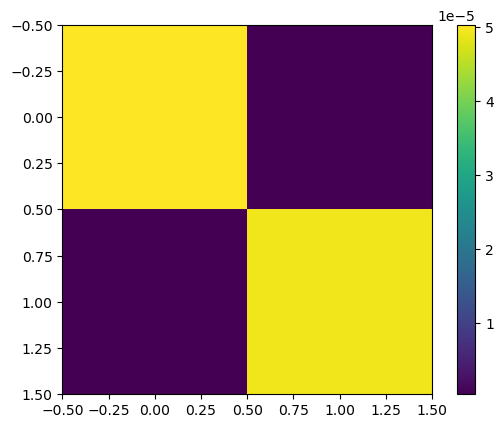

In [89]:
plt.imshow(iw.rvs())
plt.colorbar();

In [100]:
n = 100000
cn = n
x = np.array([(-1,0) for _ in range(n)] + [(1,0) for _ in range(n)] + [(2, cn)])

dmx = (x[:,0] - x[:,0].mean())
dmx@x[:,1] / (dmx @ dmx)

0.9999750006247142

0.2857142857142858